In [73]:
from skimage import  feature
import matplotlib.pyplot as io
from scipy import ndimage
import numpy as np
import cv2
def correlation_coefficient(patch1, patch2):
    product = np.mean((patch1 - patch1.mean()) * (patch2 - patch2.mean()))
    stds = patch1.std() * patch2.std()
    if stds == 0:
        return 0
    else:
        product /= stds
        return product

I= io.imread('stone.png')
if len(I.shape)==3:
    b,g,r = cv2.split(I)       # get b,g,r
    I= cv2.merge([r,g,b]) 
    im=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
else:
    im=I
im1 = im[74:165, 149:185]
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
res = cv2.matchTemplate(im,im1,cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)


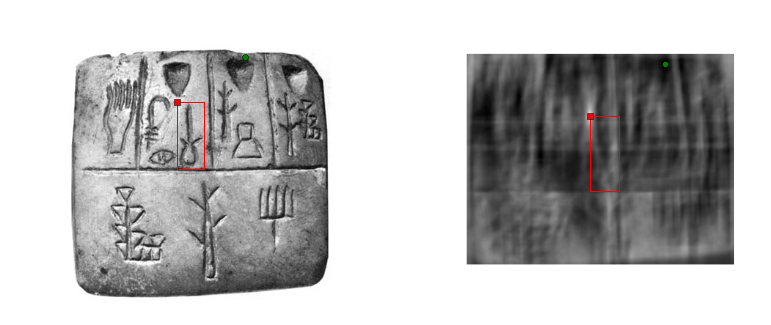

In [133]:
import matplotlib.patches as mpatches
io.figure(figsize=(20,8))
io.tight_layout
io.subplot(131)
io.imshow(im,cmap="gray")
io.plot(max_loc[0],max_loc[1],"sr")
io.plot(min_loc[0],min_loc[1],"og")

currentAxis = io.gca()
currentAxis.add_patch(mpatches.Rectangle((max_loc[0] , max_loc[1]), im1.shape[1], im1.shape[0], facecolor="none",ec='r'))
io.axis('off')
io.subplot(132)
io.imshow(res,cmap='gray')
currentAxis = io.gca()
currentAxis.add_patch(mpatches.Rectangle((max_loc[0] , max_loc[1]), im1.shape[1], im1.shape[0], facecolor="none",ec='r'))
io.plot(max_loc[0],max_loc[1],"sr")
io.plot(min_loc[0],min_loc[1],"og")

io.axis('off')
'''io.subplot(133)
io.imshow(im1,cmap='gray')
io.axis('off')'''
io.show()


In [109]:
max_loc[1]

74